In [1]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import random
%matplotlib inline
from numpy import random

np.random.seed(0)
random.seed(0)

/Users/xiangyi/anaconda3/envs/pytorch_gpu/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target

# for i in range(y.shape[0]):
#     if y[i]==2:
#         np.delete(y,i)
#y = np.array(y).reshape(-1,1)      
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))#unique函数去除其中重复的元素，并按元素由小到大返回一个新的无元素重复的元组或者列
num_cls = np.unique(y).shape[0]
num_cls

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


3

In [3]:
def init_w_b(dim,num_cls):
    w=random.rand(4,3)
    b=0
    #print(w.shape)
    
    return w

In [5]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('y_train_Shape:', y_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_test_Shape:',  y_test.shape)
num_train = X_train.shape[0]
num_test = X_test.shape[0]
#num_cls = y_train.shape[1]
w_dim = X_train.shape[1]
print('num_train',num_train)
print('num_test',num_test)
print('num_cls',num_cls)
print('w_dim',w_dim)
w = init_w_b(w_dim,num_cls) #4*3

X_train_Shape: (105, 4)
y_train_Shape: (105,)
X_test_Shape: (45, 4)
y_test_Shape: (45,)
num_train 105
num_test 45
num_cls 3
w_dim 4


In [6]:
def predict(w,X):
    y_pred = np.zeros(X.shape[0])
    score = X.dot(w)
    y_pred = np.argmax(score, axis=1)
    return y_pred

params, grads, costs = optimize(w, b, X_train, y_train, num_iter= 1000, lr = 0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

In [7]:
def model(X_train,X_test,y_train,y_test):
    #grad,cost = propagate(X_train,y_train,w,b)
    
    for i in range(num_train):
        #print('y[i]',y[i],'X[i]',X[i],'w',w,'b',b)
        score = X_train[i].dot(w) # 1*3
        #print('y_train[i]:',y_train[i],'\nX_train[i]:',X_train[i],'\nw:',w)
        
        #print('score',score,'\nscore.max()',score.max(),'\nscore[y_train[i]]:',score[y_train[i]])
       # print(score)
        
        if score.max() != score[y_train[i]]: #1 * 4 * 4 *3 = 1*3
            if score.max() > score[y_train[i]]:
                w[:,np.argmax(score)] -=  X_train[i].T 
                w[:,y_train[i]] +=  X_train[i].T
            if score.max() < score[y_train[i]]:
                w[:,np.argmax(score)] +=  X_train[i].T
                w[:,y_train[i]] -=  X_train[i].T
            
    y_pred_train = predict(w,X_train)
    y_pred_test = predict(w,X_test)
    train_acc = np.mean(y_pred_train == y_train)
    test_acc = np.mean(y_pred_test == y_test)
#     print('train_acc is ', train_acc)
#     print('test_acc is ', test_acc)
    return train_acc,test_acc
    

In [15]:
#shuffle_index = np.array(range(0, X_train.shape[0]))
total_acc_train = []
total_acc_test = []

for epoch in range(500):
    training_acc,test_acc = model(X_train,X_test,y_train,y_test)
    total_acc_train.append(training_acc)
    total_acc_test.append(test_acc)
    print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'test_acc:%.3f'%test_acc)
    #print('w:',w)

epoch: 0 traing_acc:0.924 test_acc:0.911
epoch: 1 traing_acc:0.933 test_acc:0.911
epoch: 2 traing_acc:0.933 test_acc:0.911
epoch: 3 traing_acc:0.933 test_acc:0.911
epoch: 4 traing_acc:0.962 test_acc:0.933
epoch: 5 traing_acc:0.848 test_acc:0.867
epoch: 6 traing_acc:0.924 test_acc:0.911
epoch: 7 traing_acc:0.962 test_acc:0.956
epoch: 8 traing_acc:0.924 test_acc:0.911
epoch: 9 traing_acc:0.962 test_acc:0.956
epoch: 10 traing_acc:0.924 test_acc:0.911
epoch: 11 traing_acc:0.962 test_acc:0.933
epoch: 12 traing_acc:0.848 test_acc:0.911
epoch: 13 traing_acc:0.924 test_acc:0.911
epoch: 14 traing_acc:0.924 test_acc:0.911
epoch: 15 traing_acc:0.924 test_acc:0.911
epoch: 16 traing_acc:0.924 test_acc:0.911
epoch: 17 traing_acc:0.924 test_acc:0.911
epoch: 18 traing_acc:0.924 test_acc:0.911
epoch: 19 traing_acc:0.924 test_acc:0.911
epoch: 20 traing_acc:0.924 test_acc:0.911
epoch: 21 traing_acc:0.924 test_acc:0.911
epoch: 22 traing_acc:0.924 test_acc:0.911
epoch: 23 traing_acc:0.924 test_acc:0.911
ep

epoch: 257 traing_acc:0.867 test_acc:0.933
epoch: 258 traing_acc:0.924 test_acc:0.911
epoch: 259 traing_acc:0.933 test_acc:0.911
epoch: 260 traing_acc:0.933 test_acc:0.911
epoch: 261 traing_acc:0.933 test_acc:0.911
epoch: 262 traing_acc:0.867 test_acc:0.933
epoch: 263 traing_acc:0.867 test_acc:0.933
epoch: 264 traing_acc:0.924 test_acc:0.911
epoch: 265 traing_acc:0.943 test_acc:0.911
epoch: 266 traing_acc:0.943 test_acc:0.911
epoch: 267 traing_acc:0.962 test_acc:0.956
epoch: 268 traing_acc:0.876 test_acc:0.933
epoch: 269 traing_acc:0.924 test_acc:0.911
epoch: 270 traing_acc:0.924 test_acc:0.911
epoch: 271 traing_acc:0.924 test_acc:0.911
epoch: 272 traing_acc:0.924 test_acc:0.911
epoch: 273 traing_acc:0.924 test_acc:0.911
epoch: 274 traing_acc:0.924 test_acc:0.911
epoch: 275 traing_acc:0.924 test_acc:0.911
epoch: 276 traing_acc:0.933 test_acc:0.911
epoch: 277 traing_acc:0.933 test_acc:0.911
epoch: 278 traing_acc:0.933 test_acc:0.911
epoch: 279 traing_acc:0.933 test_acc:0.911
epoch: 280 

(0, 1)

(0, 200)

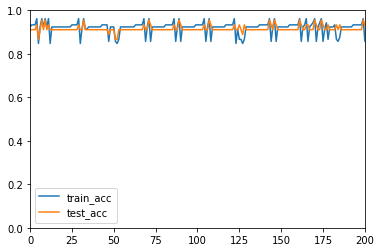

In [16]:
train_acc = np.array(total_acc_train)
test_acc = np.array(total_acc_test)
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train_acc', 'test_acc'])

plt.ylim(0,1)
plt.xlim(0,200)

plt.show()

In [17]:
d = model(X_train,X_test,y_train,y_test)
d

(0.9428571428571428, 0.9333333333333333)

In [66]:
a=np.array([1,2,3])
score = np.array([1,2,6])
score[np.where(score == score.max())]

array([6])

In [67]:
w = np.ones((4,3))
x = np.zeros((1,4))
w
x
w - x.T

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[0., 0., 0., 0.]])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])